In [2]:
from utils.binaries import *
from utils.plotting import *

13:39:37 (  +41.9s) [INFO   ] -- import logging
13:39:37 (   +89ms) [INFO   ] -- import numpy as np
13:39:37 (    +6ms) [INFO   ] -- import uncertainties
13:39:37 (  +174ms) [INFO   ] -- import pandas as pd
13:39:37 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
13:39:37 (    +1ms) [INFO   ] -- import binaries.tools as tools
13:39:37 (  +272ms) [INFO   ] -- import matplotlib.pyplot as plt
13:39:38 (  +384ms) [INFO   ] -- import seaborn as so
13:39:38 (    +1ms) [INFO   ] -- import plotting.tools as plot
13:39:38 (    +5ms) [DEBUG  ] -- font size set to 9.5
13:39:38 (    +1ms) [DEBUG  ] -- label size set to 13.0
13:39:38 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
13:39:38 (    +0ms) [DEBUG  ] -- markersize set to 2.0
13:39:38 (    +1ms) [DEBUG  ] -- usetex set to False


In [9]:
df = pd.read_csv(f'/home/filip/xy-calibration/results/outPositionsComb_13248.txt', sep=',', names=('time', 'x', 'y', 
                 'event_number', 'user_id', 'temp_led', 'temp_phd', 'temp_board', 'phd_signal', 
                 'FDeventSum'), comment='#', header=0)
df['r'] = np.sqrt(df['x']**2 + df['y']**2)
df = df[df['r'] > 750]


In [10]:
row_median, col_median = [], []
X, Y = np.unique(df['x']), np.unique(df['y'])

for x in X:
    col_median.append(np.nanmedian(df[df['x'] == x]['FDeventSum']))
for y in Y:
    row_median.append(np.nanmedian(df[df['y'] == y]['FDeventSum']))

col_median = np.array(col_median)
row_median = np.array(row_median)

<Axes: >

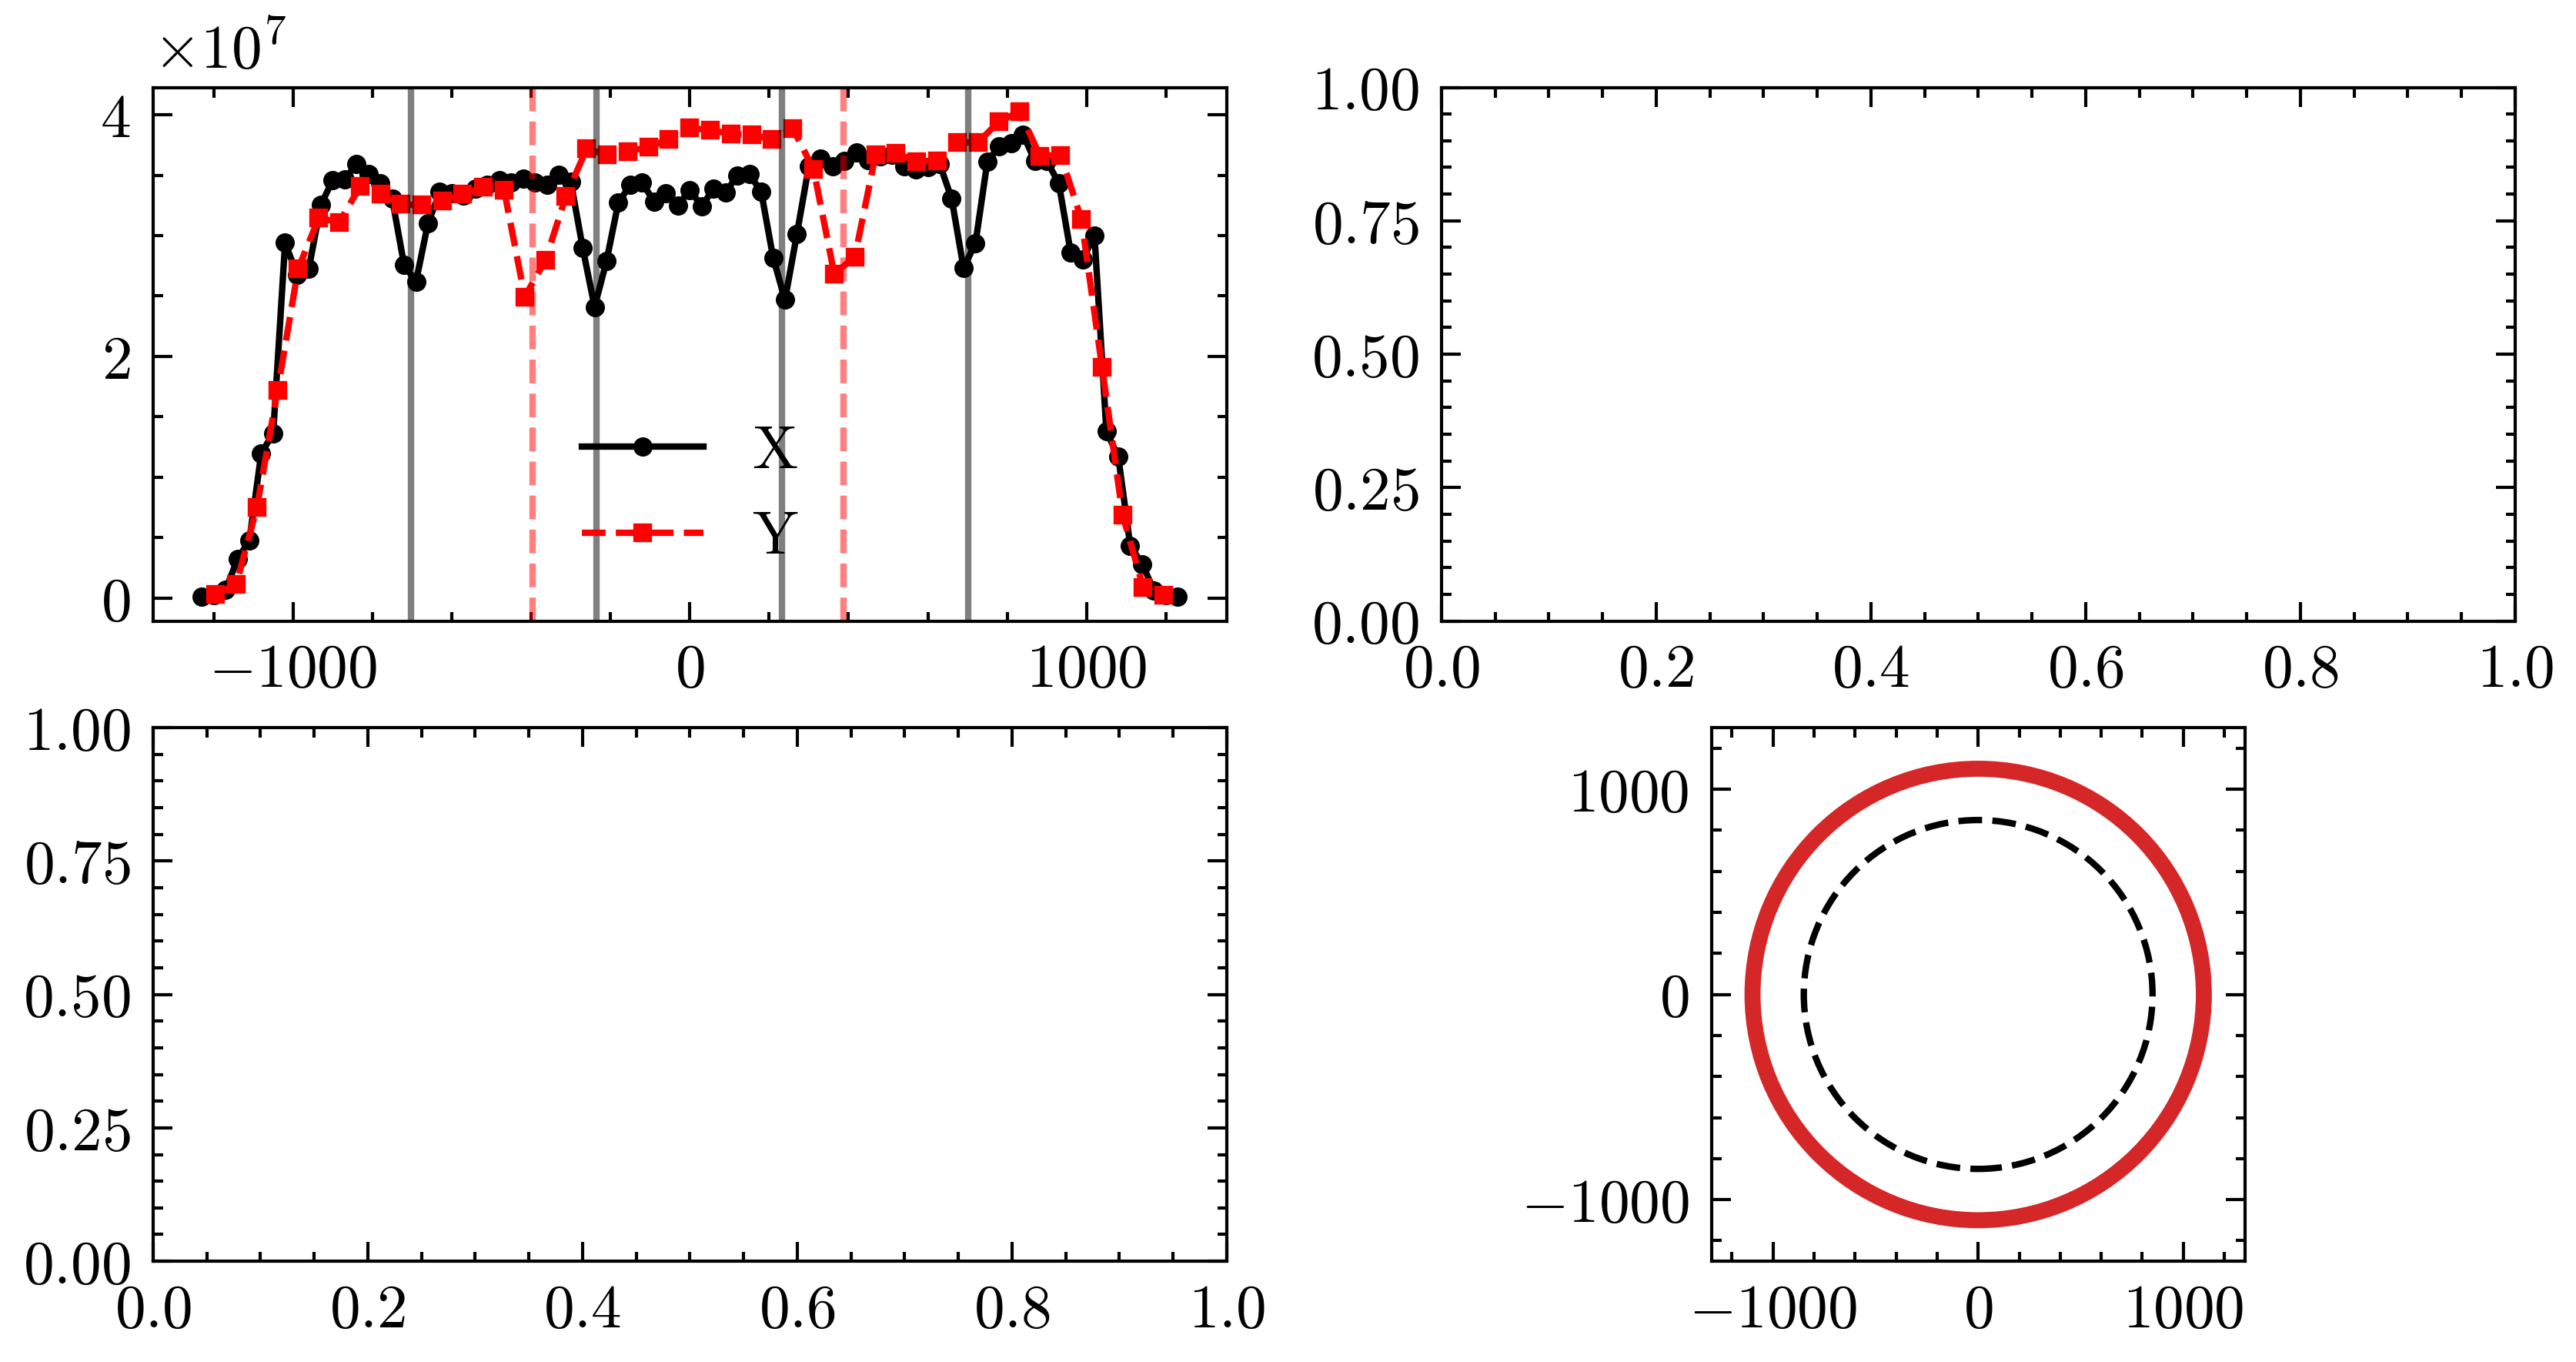

In [20]:
from scipy.signal import argrelmin
from scipy.signal import find_peaks

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, width_ratios = [1, 1], figsize=[6.6, 6.6])

# filter_x = argrelmin(np.array(col_median), order=5)[0]
# filter_y = argrelmin(np.array(row_median), order=5)[0]
filter_x, _ = find_peaks(-col_median, prominence=0.1 * np.max(col_median), distance=8)
filter_y, _ = find_peaks(-row_median, prominence=0.1 * np.max(row_median), distance=8)

ax1.plot(X, col_median, label='X')
ax1.plot(Y, row_median, label='Y')

xx, yy = [], []

for x in filter_x:
    # TODO: handle edges?
    weighted_mean = np.average(X[x-1:x+2], weights=1-col_median[x-1:x+2]/col_median[x-1:x+2].max())
    if np.abs(weighted_mean) > 850: continue
    ax1.axvline(weighted_mean, alpha=0.5)
    xx.append(weighted_mean)
for y in filter_y:
    weighted_mean = np.average(Y[y-1:y+2], weights=1-row_median[y-1:y+2]/row_median[y-1:y+2].max())
    if np.abs(weighted_mean) > 850: continue
    ax1.axvline(weighted_mean, c='r', ls='--', alpha=0.5)
    yy.append(weighted_mean)


ax1.legend()

from utils.Auger.FD import AperturePlot

AperturePlot(ax4, filterStructure=False)

In [5]:
print(np.mean(xx), np.mean(yy))

-4.486696119043889 -209.7577530078691


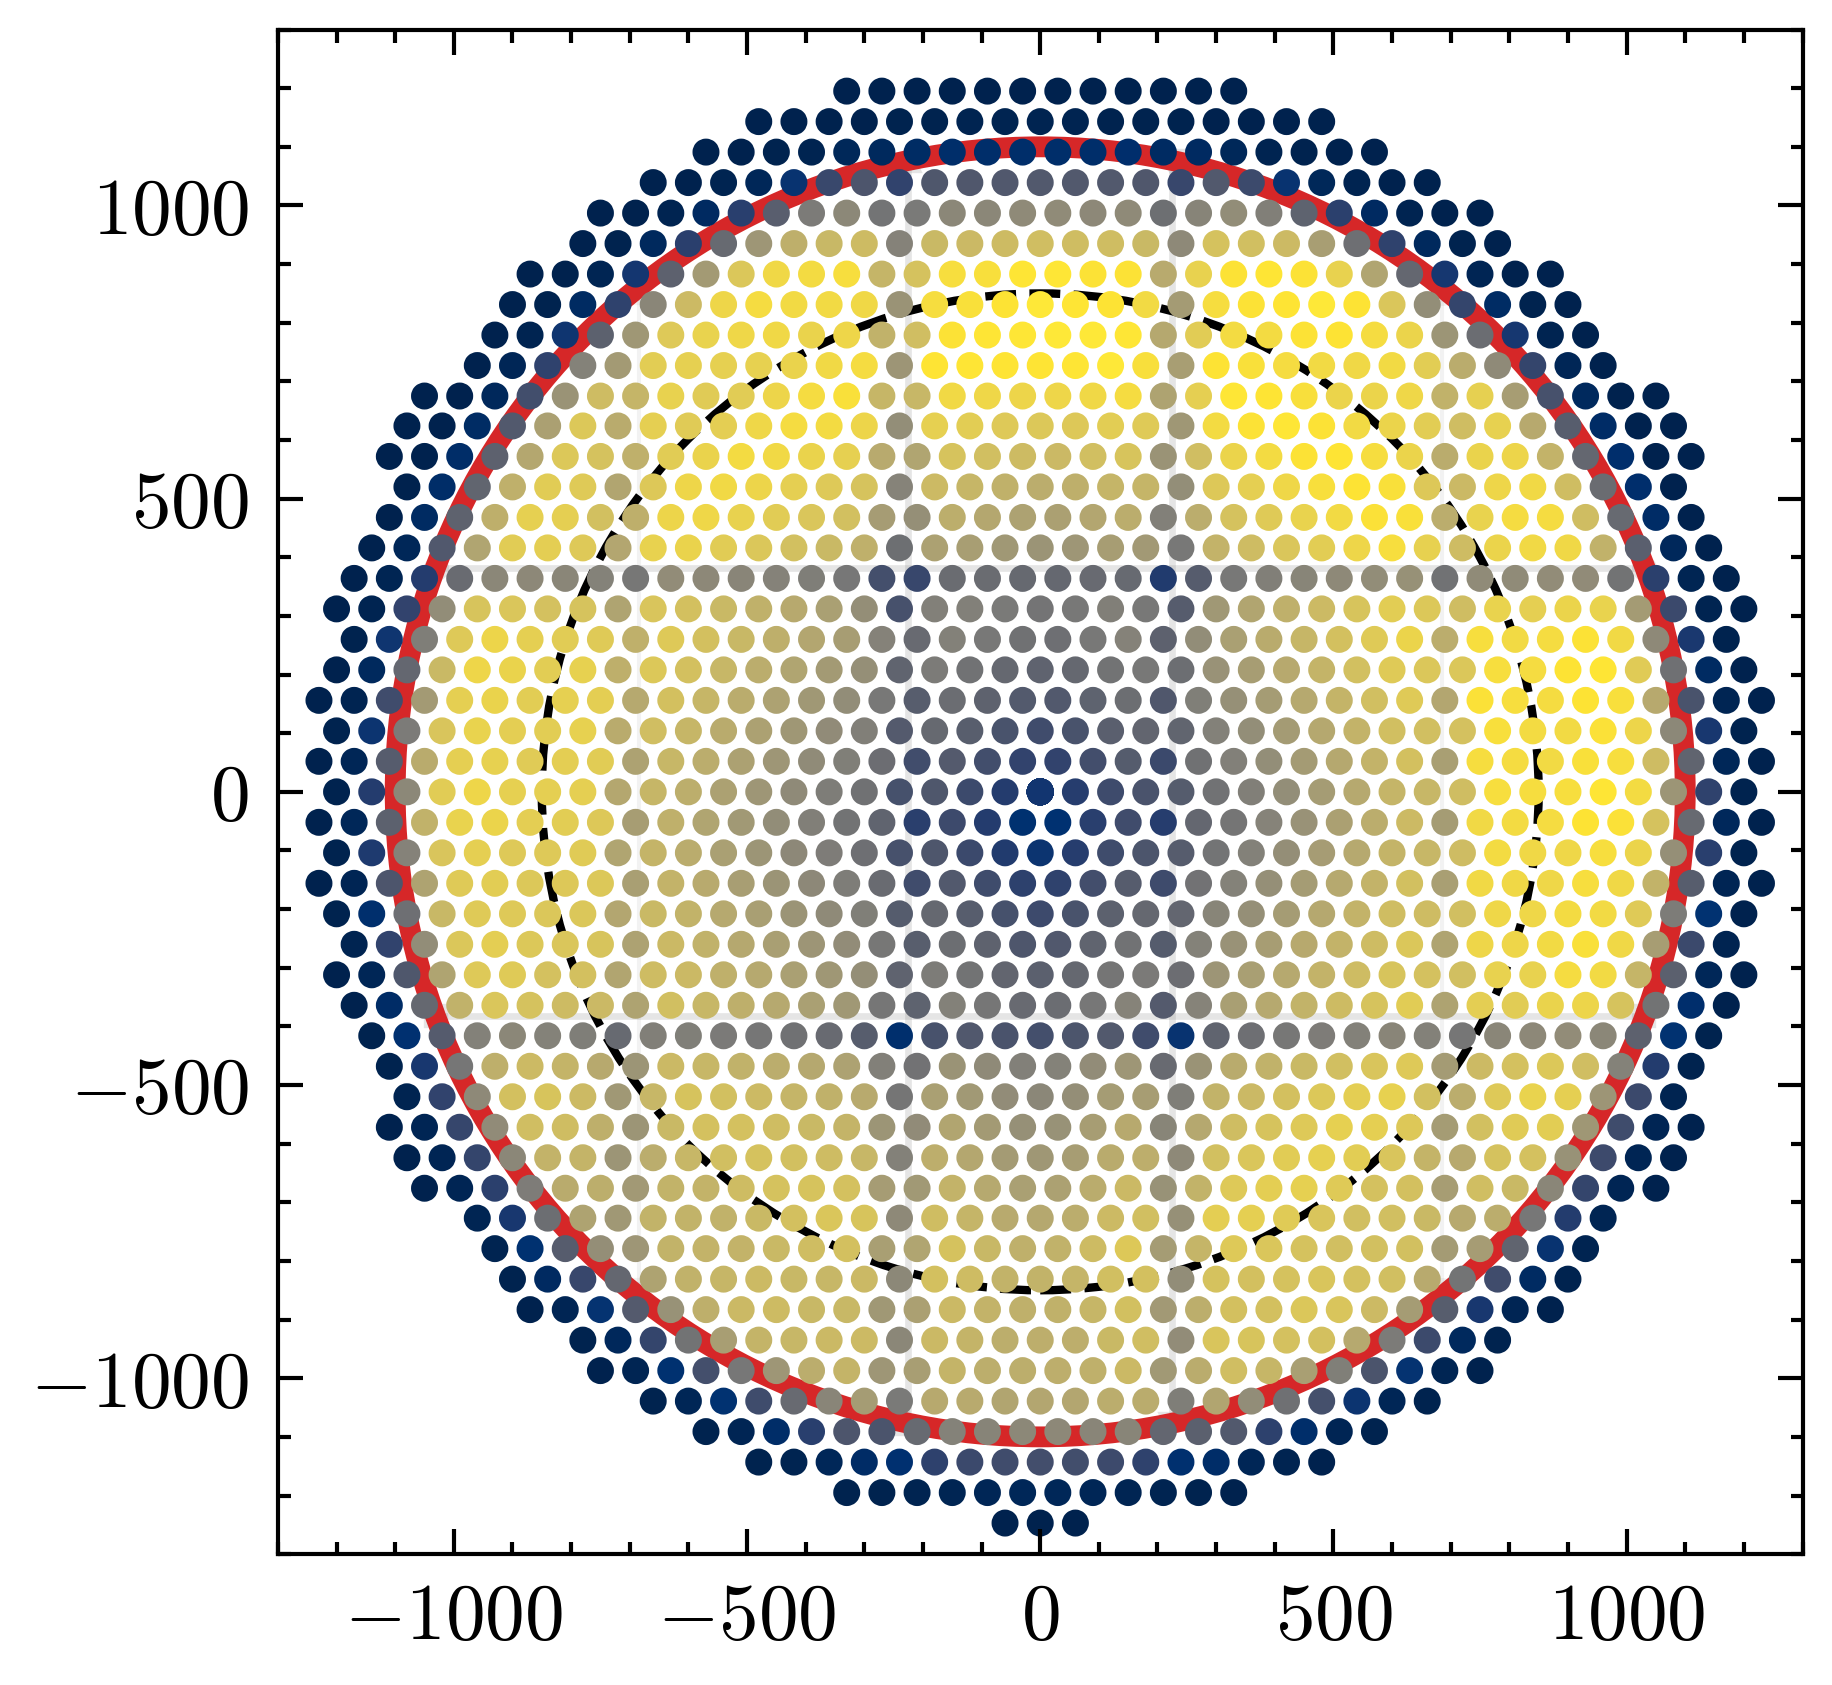

In [ ]:
from utils.Auger.FD import AperturePlot

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

ax.scatter(df['x'], df['y'], c=df['FDeventSum'] / df['FDeventSum'].max(), 
                        marker="o", cmap="cividis", s=5)
